In [24]:
import os
os.chdir("/Users/mphomafata/Documents/GitHub/Chromatographic-data")
import pandas as pd
from scipy.io import netcdf_file
beer_files = sorted(os.listdir("/Users/mphomafata/Documents/Work_file/Collaborative Work/Cody/Untargeted - Gin and Beer/raw_data/Beer/"))
beer_data = []
for beer_file in beer_files[:3]:
    cdf_file = netcdf_file(f'/Users/mphomafata/Documents/Work_file/Collaborative Work/Cody/Untargeted - Gin and Beer/raw_data/Beer/{beer_file}', mmap=False)
    data = pd.DataFrame(columns=["retention_time","mass_values", "intensities"])
    # variables of interest
    mass_values = cdf_file.variables['mass_values'].data
    retention_time = cdf_file.variables['scan_acquisition_time'].data
    point_count = cdf_file.variables['point_count'].data
    
    # cumulative counter 
    def Cumulative(lists): 
        cu_list = [] 
        length = len(lists) 
        cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)] 
        return cu_list[1:]
    lists = point_count
    point_counter = Cumulative(lists)
    
    for i, s in enumerate(retention_time):
        if i==0:
            start = i
        else:
            start = point_counter[i-1]+1
        stop = point_counter[i]
        rt = cdf_file.variables['scan_acquisition_time'][i]
        # print("retention time " + str(rt)+ " has " + str(point_count[i]) + " points starting at " + str(start) + " ending at " + str(stop))
        intensities = cdf_file.variables['intensity_values'][start:stop]
        mass_values = cdf_file.variables['mass_values'][start:stop]
        data.loc[len(data.index)] = [rt,mass_values, intensities]
    data = data.explode(['mass_values','intensities']).reset_index(drop=True)
    # data = data.explode('intensities')
    beer_data.append(data)
    # data.to_excel(f"{beer_file}.xlsx") # too large  to print to excel
    print("Finished sample " + str(beer_files.index(f"{beer_file}") +1) + " of " + str(len(beer_files)))
    # print(f"Sample {beer_file} completed!")
cdf_file .close()


Finished sample 1 of 95
Finished sample 2 of 95
Finished sample 3 of 95


In [25]:
beer_data[0]

,retention_time,mass_values,intensities
0,125.375,50.049999,194.0
1,125.375,51.0,290.0
2,125.375,51.849998,195.0
3,125.375,53.049999,244.0
4,125.375,54.0,370.0
...,...,...,...
483774,2099.804,207.100006,392.0
483775,2099.804,208.0,198.0
483776,2099.804,208.949997,218.0
483777,2099.804,219.0,169.0


# Plot the 2D and 3D spectrum for the first sample


# 1D overlay

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

my_data = pd.merge(left = beer_data[0], right = beer_data[1], on = 'retention_time', how = 'outer')
print(my_data)

# Creating figure
fig = plt.figure(figsize = (12, 10))
 
for i in range(0,2):
    print(my_data[i]["retention_time"])
    ax1 = fig.add_subplot(2,1,1)
    data1 = my_data[i].groupby(['retention_time']).aggregate({'intensities':'sum'}).reset_index(drop=False)
    
    print(data1)
    x1 = data1["retention_time"]/60
    y1 = data1["intensities"]
    ax1 = plt.subplot(2,1,1)    
    ax1 = sns.scatterplot(data=data1, x=x1, y=y1, c='green',marker = "x", s= 2, alpha = 0.01)
    
    ax2 = fig.add_subplot(2,1,2)
    data2 = my_data[i].groupby('mass_values').aggregate(intensities=('intensities','sum')).reset_index(drop=False)
    x2 = data2["mass_values"]/60
    y2 = data2["intensities"]
    ax2 = plt.subplot(2,1,1)    
    ax2 = sns.scatterplot(data = data2,x=x2, y=y2, c='green',marker = "x", s= 2, alpha = 0.01)
    
    # plt.xlabel('Retention time (minutes)', fontweight ='bold') 
    # plt.ylabel('Mass-to-charge (mz ratio)', fontweight ='bold') 


plt.savefig(fname = "overlay_plot.jpg",dpi = 600,
                        transparent=True, format = "jpg")

        retention_time mass_values_x intensities_x mass_values_y intensities_y
0              125.375     50.049999         194.0           NaN           NaN
1              125.375          51.0         290.0           NaN           NaN
2              125.375     51.849998         195.0           NaN           NaN
3              125.375     53.049999         244.0           NaN           NaN
4              125.375          54.0         370.0           NaN           NaN
...                ...           ...           ...           ...           ...
965513        2099.806           NaN           NaN    177.050003         513.0
965514        2099.806           NaN           NaN    187.050003         323.0
965515        2099.806           NaN           NaN    187.949997         165.0
965516        2099.806           NaN           NaN    191.050003         154.0
965517        2099.806           NaN           NaN         207.0         405.0

[965518 rows x 5 columns]


KeyError: 0

<Figure size 1200x1000 with 0 Axes>

# 2D Plot

/Users/mphomafata/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/Users/mphomafata/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


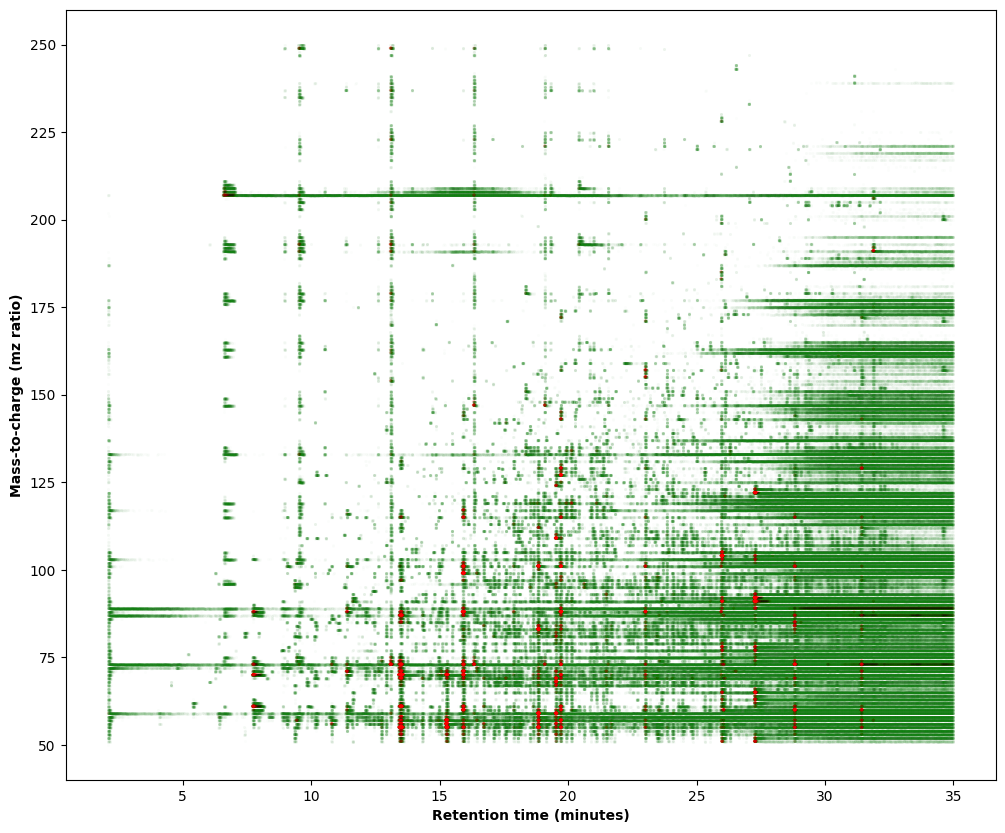

In [5]:
import matplotlib.pyplot as plt



my_data = beer_data


# Creating figure
fig= plt.figure(figsize = (12, 10))
 
# Creating plot
for i in range(len(my_data)):
    
    data = my_data[i]
    x = data["retention_time"]/60
    y = data["mass_values"]
    z = data["intensities"]

    plt.scatter(x, y, 
                 c = 'green', 
                 marker = "x", s= 2, alpha = 0.01)
    plt.scatter(x, y,
                c = 'red', 
                 marker = "x", s= 2, alpha = z/(max(z)))
    plt.xlabel('Retention time (minutes)', fontweight ='bold') 
    plt.ylabel('Mass-to-charge (mz ratio)', fontweight ='bold') 

# plt.savefig(fname = "2d_plot.jpg",dpi = 600,
#                         transparent=True, format = "jpg")

# 3D Plot

/Users/mphomafata/PycharmProjects/pythonProject/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


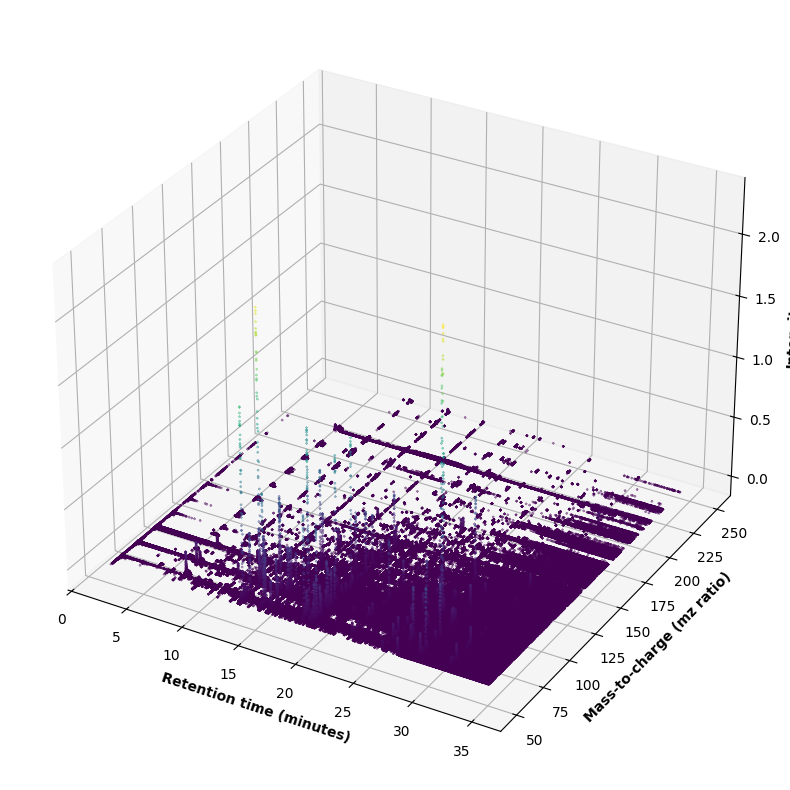

In [6]:
import matplotlib.pyplot as plt
data = beer_data[0]

# Creating figure
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=data["retention_time"]/60,
           ys = data["mass_values"], 
           zs = data["intensities"], 
           c = data["intensities"]
           ,
           marker = "x", s= 1, alpha = 0.5)

ax.set_xlabel('Retention time (minutes)', fontweight ='bold') 
ax.set_ylabel('Mass-to-charge (mz ratio)', fontweight ='bold') 
ax.set_zlabel('Intensity', fontweight ='bold')
plt.savefig(fname = "3d_plot.jpg",dpi = 300,
                        transparent=True, format = "jpg")
plt.show()

# Peak detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
x1 = pd.DataFrame(beer_data[0])
x1=x1.groupby(["retention_time"]).aggregate({'intensities':'sum'}).reset_index()
x1=x1["intensities"].reset_index(drop=True)
# x=x.iloc[1500:2500].reset_index(drop=True)
peaks1, _ = find_peaks(x1, width=1)

x2 = pd.DataFrame(beer_data[0])
x2=x2.groupby(["mass_values"]).aggregate({'intensities':'sum'}).reset_index()
x2=x2["intensities"].reset_index(drop=True)
# x=x.iloc[1500:2500].reset_index(drop=True)
peaks2, _ = find_peaks(x2)


fig = plt.figure(figsize = (15, 12))
ax1 = fig.add_subplot(2,1,1)
ax1 = plt.plot(x1,'black')
ax1 = plt.plot(peaks1, x1[peaks1], "x",color = 'red') 

ax2 = fig.add_subplot(2,1,2)
ax2 = plt.plot(x2,'black')
ax2 = plt.plot(peaks2, x2[peaks2], "x",color = 'red') 

# beer_data[0]